# Black Body Radiation
Authors:  A + B

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# Introduction


some facts about Black Body radiation

# Wien's displacement law

/Users/martina/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


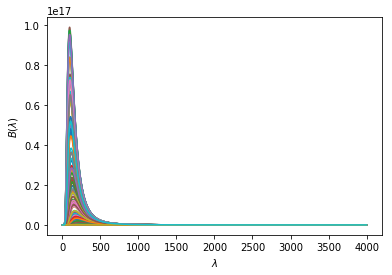

In [67]:
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23
sigma = 5.670373e-8 #W m^-2 K^-4
Rsun = 7.0e8 #m
Lsun = 3.828e26 #W

def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

# generate x-axis in increments from 1nm to 3 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
wavelengths = np.arange(1e-9, 4e-6, 1e-10) 

#generate 10 temperatures

intensity=[]
Temp=[]
ntemp=200
for i in range(ntemp):
    T = np.random.uniform(1000,30000,1)[0]
    B = planck(wavelengths, T)
    intensity.append(B)
    Temp.append(T)
    plt.plot(wavelengths*1e9, B) 
    plt.ylabel(r'$B(\lambda)$')
    plt.xlabel(r'$\lambda$')


# show the plot
plt.show()

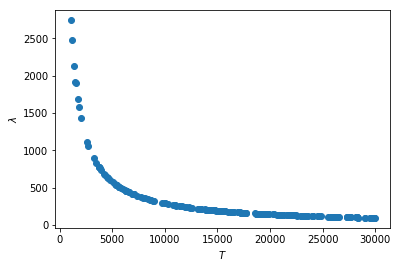

In [68]:
#get maximum
lmax=[]
Tmax=[]
for i in range(ntemp):
    l = np.argmax(intensity[i])
    lmax.append(wavelengths[l])
    Tmax.append(Temp[i])

    
plt.scatter(np.array(Tmax),np.array(lmax)*1e9)
plt.xlabel(r'$T$')
plt.ylabel(r'$\lambda$')
plt.show()

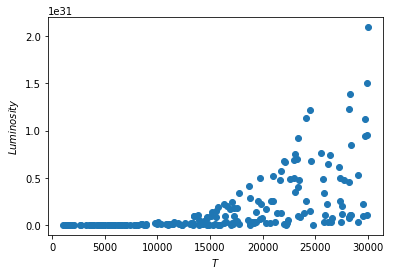

In [129]:
#Stefan-Boltzmann law
#Computing Luminosity for each stellar type: 
#MS main sequence, WD white dwarf, G giant, RSG Red Supergiant, BSG blue Supergiant
#with typical radii in units of solar radius Rsun
Luminosity_MS=[]
Luminosity_WD=[]
Luminosity_G=[]
Luminosity_RSG=[]
Luminosity_BSG=[]
rMS=[0.1,10]
rWD=[0.008,0.012]
rG=[10,100]
rRSG=[100,1000]
rBSG=[20,50]

def SB_law(tp,r):
    return 4.*np.pi*r**2*sigma*tp**4

radii=[]
for t in Tmax:
    r = np.random.uniform(rMS[0],rMS[1],1)[0]*Rsun
    Luminosity_MS.append(SB_law(t,r))
    r = np.random.uniform(rWD[0],rWD[1],1)[0]*Rsun
    Luminosity_WD.append(SB_law(t,r))
    r = np.random.uniform(rG[0],rG[1],1)[0]*Rsun
    Luminosity_G.append(SB_law(t,r))
    r = np.random.uniform(rRSG[0],rRSG[1],1)[0]*Rsun
    Luminosity_RSG.append(SB_law(t,r))
    r = np.random.uniform(rBSG[0],rBSG[1],1)[0]*Rsun
    Luminosity_BSG.append(SB_law(t,r))
    
    #radii.append(r)
    
plt.scatter(np.array(Tmax),np.array(Luminosity_MS))
#plt.scatter(np.array(Tmax),sigma*np.array(Tmax)**4)
plt.xlabel(r'$T$')
plt.ylabel(r'$Luminosity$')
plt.show()

In [126]:
#Bolometric magnitude, not needed
#Mbol=[]
#M=[]
#for l in np.array(Luminosity_MS):
#    Mbol.append(-2.5*np.log10(l)+71.197425)

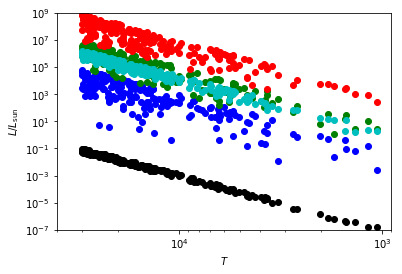

In [132]:
#As expected, L(T) is a power-law with exponent 4
#The different color curves have different radii
plt.scatter(np.array(Tmax),np.array(Luminosity_MS)/Lsun,c='b')
plt.scatter(np.array(Tmax),np.array(Luminosity_WD)/Lsun,c='k')
plt.scatter(np.array(Tmax),np.array(Luminosity_G)/Lsun,c='g')
plt.scatter(np.array(Tmax),np.array(Luminosity_RSG)/Lsun,c='r')
plt.scatter(np.array(Tmax),np.array(Luminosity_BSG)/Lsun,c='c')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$T$')
plt.ylabel(r'$L/L_\mathrm{sun}$')
plt.xlim([4e4,9e2])
plt.ylim([1e-7,1e9])
plt.show()

In [173]:
#Rescaling the effective Temperature in B-V units
#This is to match the shape of the HR diagram here: https://upload.wikimedia.org/wikipedia/commons/6/6b/HRDiagram.png
#Using Newton method to find the root of Ballesteros' formula
import scipy.optimize as so

def TvsBV(x):
    return 4600.*(1./(0.92*x+1.7)+1./(0.92*x+0.62))-t

#bv=-0.4
#t=10000
#print TvsBV(bv)
#print 4600.*(1./(0.92*bv+1.7)+1./(0.92*bv+0.62))-t

#bvrange=np.arange(-0.4,2.5,step=0.1)
#for t in Tmax:
#    plt.plot(bvrange,TvsBV(bvrange))
#plt.show()

BmV=[]
for t in Tmax:
    if(t>2e4):
        x0=-0.3
    else:
        x0=-0.1
    BmV.append(so.newton(TvsBV,x0))
    #print t, so.newton(TvsBV,x0)
    #print TvsBV(so.newton(TvsBV,x0))+t
    


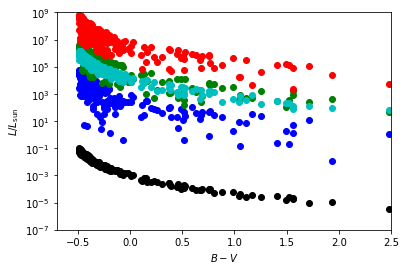

In [176]:
#This matches the HR diagram accurately enough
#However, we should resample the classes to match it perfectly
#For example, too many WD in the low-T region (high B-V), too many giants in the high-T region
plt.scatter(np.array(BmV),np.array(Luminosity_MS)/Lsun,c='b')
plt.scatter(np.array(BmV),np.array(Luminosity_WD)/Lsun,c='k')
plt.scatter(np.array(BmV),np.array(Luminosity_G)/Lsun,c='g')
plt.scatter(np.array(BmV),np.array(Luminosity_RSG)/Lsun,c='r')
plt.scatter(np.array(BmV),np.array(Luminosity_BSG)/Lsun,c='c')
#plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$B-V$')
plt.ylabel(r'$L/L_\mathrm{sun}$')
plt.xlim([-0.7,2.5])
plt.ylim([1e-7,1e9])
plt.show()